In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = pd.read_csv('/data/acker/ALA/ranks_washu_max_2021-2023.csv')
df

,Unnamed: 0,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank
0,0,1001,7.800000,"POLYGON ((-86.921196 32.657542, -86.920352 32....",1,1,1085
1,1,1003,8.466667,"POLYGON ((-88.02858 30.226763, -88.023991 30.2...",1,3,413
2,2,1005,7.666667,"POLYGON ((-85.748032 31.619181, -85.745435 31....",1,5,1230
3,3,1007,8.266667,"POLYGON ((-87.421936 33.003379, -87.331769 33....",1,7,599
4,4,1009,7.633333,"POLYGON ((-86.963358 33.858221, -86.959667 33....",1,9,1278
...,...,...,...,...,...,...,...
3137,3137,56037,5.466667,"POLYGON ((-110.054384 42.01103, -110.054363 42...",56,37,2954
3138,3138,56039,5.033333,"POLYGON ((-111.053610326574 44.6662669770011, ...",56,39,3035
3139,3139,56041,6.333333,"POLYGON ((-111.046626637972 41.1401249258729, ...",56,41,2637
3140,3140,56043,5.266666,"POLYGON ((-108.550628 44.151793, -108.550562 4...",56,43,2994


In [2]:
df1 = df.sort_values(by='CDVE_rank', ascending=True)
df1

,Unnamed: 0,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank
76,76,2090,14.333333,"POLYGON ((-148.663265 64.59079, -148.648208 64...",2,90,1
217,217,6063,14.200000,"POLYGON ((-121.497032 40.437017, -121.494866 4...",6,63,2
238,238,6105,13.466666,"POLYGON ((-123.622387 40.931703, -123.614562 4...",6,105,3
239,239,6107,12.933334,"POLYGON ((-119.566468 36.494339, -119.563662 3...",6,107,4
197,197,6023,12.633334,"POLYGON ((-124.408601 40.443201, -124.396642 4...",6,23,5
...,...,...,...,...,...,...,...
548,548,15005,3.533334,"POLYGON ((-157.014590828961 21.1835249334756, ...",15,5,3138
1805,1805,35019,3.500000,"POLYGON ((-105.312707 34.354046, -105.313009 3...",35,19,3139
83,83,2158,3.366667,"MULTIPOLYGON (((-164.616424 63.045106, -164.61...",2,158,3140
547,547,15003,3.100000,"MULTIPOLYGON (((-157.659825 21.328568, -157.65...",15,3,3141


In [3]:
df1 = df1.drop('geometry',axis=1)

In [4]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [5]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'HI', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [6]:
counties_conus['GEOID'] = counties_conus['GEOID'].astype(int)

In [7]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
df_counties = df1.merge(counties_conus[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
df_counties = gpd.GeoDataFrame(df_counties, geometry='geometry')

# Display the result
df_counties


,Unnamed: 0,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,geometry,STUSPS
0,76,2090,14.333333,2,90,1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",AK
1,217,6063,14.200000,6,63,2,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",CA
2,238,6105,13.466666,6,105,3,"POLYGON ((-123.62239 40.9317, -123.61456 40.93...",CA
3,239,6107,12.933334,6,107,4,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",CA
4,197,6023,12.633334,6,23,5,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",CA
...,...,...,...,...,...,...,...,...
3137,548,15005,3.533334,15,5,3138,"POLYGON ((-157.01459 21.18352, -157.01192 21.1...",HI
3138,1805,35019,3.500000,35,19,3139,"POLYGON ((-105.31271 34.35405, -105.31301 34.3...",NM
3139,83,2158,3.366667,2,158,3140,"MULTIPOLYGON (((-164.61642 63.04511, -164.6145...",AK
3140,547,15003,3.100000,15,3,3141,"MULTIPOLYGON (((-157.65982 21.32857, -157.6588...",HI


In [8]:
df_counties = df_counties[df_counties['PM25_90th'] != 0]

In [9]:
import numpy as np
import pandas as pd

# Check distribution statistics
no2_stats = df_counties['PM25_90th'].describe()
print(no2_stats)

# Get quantiles to determine natural breaks
quantiles = np.percentile(df_counties['PM25_90th'], [5, 25, 50, 75, 90, 95, 98, 99])
print("Quantiles (5%, 25%, 50%, 75%, 90%, 95%, 98%, 99%):", quantiles)


count    3142.000000
mean        7.372879
std         1.167150
min         2.433333
25%         6.700000
50%         7.433333
75%         8.099999
max        14.333333
Name: PM25_90th, dtype: float64
Quantiles (5%, 25%, 50%, 75%, 90%, 95%, 98%, 99%): [ 5.33333349  6.70000029  7.43333292  8.09999943  8.59999943  9.09999943
  9.76666641 10.4333334 ]


In [10]:
import numpy as np

# Extract the North Slope row from `counties_conus`
north_slope = counties[counties['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['DV'] = np.nan

In [11]:
# Assuming df contains the relevant columns: 'CDVE_rank' and 'PM25_90th'
df_sorted = df_counties[['CDVE_rank', 'PM25_90th']].dropna().sort_values(by='PM25_90th')

# Define the CDVE value ranges from assign_color function
cdve_ranges = {
    "Cleanest 50%": df_sorted[df_sorted['PM25_90th'] < 7.433]['CDVE_rank'].max(),
    "Dirtiest 50%": df_sorted[(df_sorted['PM25_90th'] >= 7.433) & (df_sorted['PM25_90th'] < 8.099)]['CDVE_rank'].max(),
    "Dirtiest 25%": df_sorted[(df_sorted['PM25_90th'] >= 8.099) & (df_sorted['PM25_90th'] < 8.599)]['CDVE_rank'].max(),
    "Dirtiest 10%": df_sorted[(df_sorted['PM25_90th'] >= 8.599) & (df_sorted['PM25_90th'] < 9.099)]['CDVE_rank'].max(),
    "Dirtiest 5%": df_sorted[(df_sorted['PM25_90th'] >= 9.099) & (df_sorted['PM25_90th'] < 9.766)]['CDVE_rank'].max(),
    "Dirtiest 2%": df_sorted[(df_sorted['PM25_90th'] >= 9.766) & (df_sorted['PM25_90th'] < 10.43)]['CDVE_rank'].max(),
    "Dirtiest 1%": df_sorted[df_sorted['PM25_90th'] >= 10.433]['CDVE_rank'].max()
}

# Convert to DataFrame for display
cdve_ranges_df = pd.DataFrame(list(cdve_ranges.items()), columns=['Category', 'CDVE_rank'])

cdve_ranges_df

,Category,CDVE_rank
0,Cleanest 50%,3142
1,Dirtiest 50%,1540
2,Dirtiest 25%,770
3,Dirtiest 10%,315
4,Dirtiest 5%,158
5,Dirtiest 2%,63
6,Dirtiest 1%,31


In [12]:
df_counties[(df_counties['PM25_90th'] < 7.433)] #& (df_counties['PM25_90th'] >= 7.433)]

,Unnamed: 0,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,geometry,STUSPS
1582,1025,21065,7.416667,21,65,1583,"POLYGON ((-84.12675 37.64508, -84.12483 37.646...",KY
1583,2444,47033,7.410000,47,33,1584,"POLYGON ((-89.36154 35.82371, -89.36049 35.825...",TN
1584,2467,47079,7.400000,47,79,1585,"POLYGON ((-88.5294 36.17018, -88.52754 36.2058...",TN
1585,871,19165,7.400000,19,165,1585,"POLYGON ((-95.55796 41.60975, -95.55795 41.616...",IA
1586,2155,40049,7.400000,40,49,1585,"POLYGON ((-97.66848 34.69349, -97.66831 34.768...",OK
...,...,...,...,...,...,...,...,...
3137,548,15005,3.533334,15,5,3138,"POLYGON ((-157.01459 21.18352, -157.01192 21.1...",HI
3138,1805,35019,3.500000,35,19,3139,"POLYGON ((-105.31271 34.35405, -105.31301 34.3...",NM
3139,83,2158,3.366667,2,158,3140,"MULTIPOLYGON (((-164.61642 63.04511, -164.6145...",AK
3140,547,15003,3.100000,15,3,3141,"MULTIPOLYGON (((-157.65982 21.32857, -157.6588...",HI


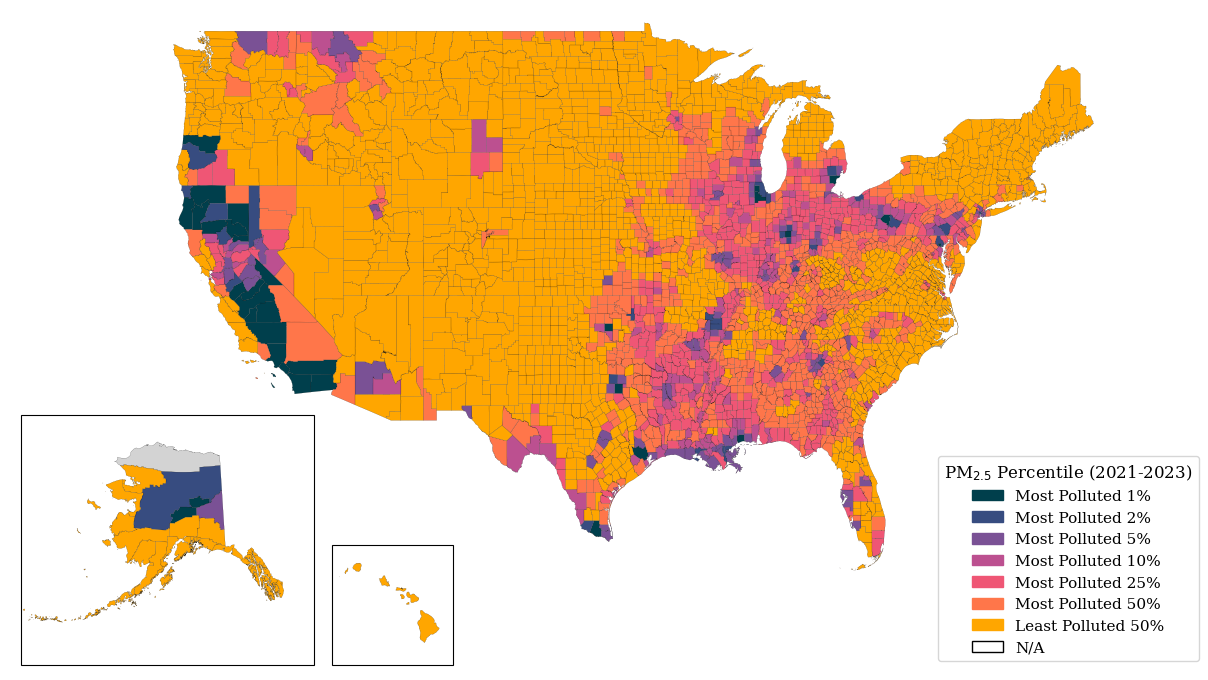

In [13]:
#figure 2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = df_counties.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "Most Polluted 1%": "#003f4c",
    "Most Polluted 2%": "#374c80",
    "Most Polluted 5%": "#7a5195",
    "Most Polluted 10%": "#bc5090",
    "Most Polluted 25%": "#ef5675",
    "Most Polluted 50%": "#ff764a",
    "Least Polluted 50%": "#ffa600",
}
#Quantiles (5%, 25%, 50%, 75%, 90%, 95%, 98%, 99%): [ 5.33333349  6.70000029  7.43333292  8.09999943  8.59999943  9.09999943
 # 9.76666641 10.4333334 ]
# Assign colors manually based on new NO₂ rank ranges
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 7.433:
        return range_colors["Least Polluted 50%"]
    elif 7.433 <= value < 8.099:
        return range_colors["Most Polluted 50%"]
    elif 8.099 <= value < 8.599:
        return range_colors["Most Polluted 25%"]
    elif 8.599 <= value < 9.099:
        return range_colors["Most Polluted 10%"]
    elif 9.099 <= value < 9.766:
        return range_colors["Most Polluted 5%"]
    elif 9.766 <= value < 10.43:
        return range_colors["Most Polluted 2%"]
    elif value >= 10.433:
        return range_colors["Most Polluted 1%"]


# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -62, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)
# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope


# Plot Alaska counties
'''alaska_counties.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["Most Polluted 1%", "Most Polluted 2%", "Most Polluted 5%", "Most Polluted 10%", "Most Polluted 25%", "Most Polluted 50%", "Least Polluted 50%"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)
plt.rcParams["font.family"] = "serif"


plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(7.2, 1.8),  # Adjusted to place it in the lower right corner
    title=r"PM$_{2.5}$ Percentile (2021-2023)",
    fontsize=11,
    title_fontsize=12
)

# Add a title to the plot
plt.show()


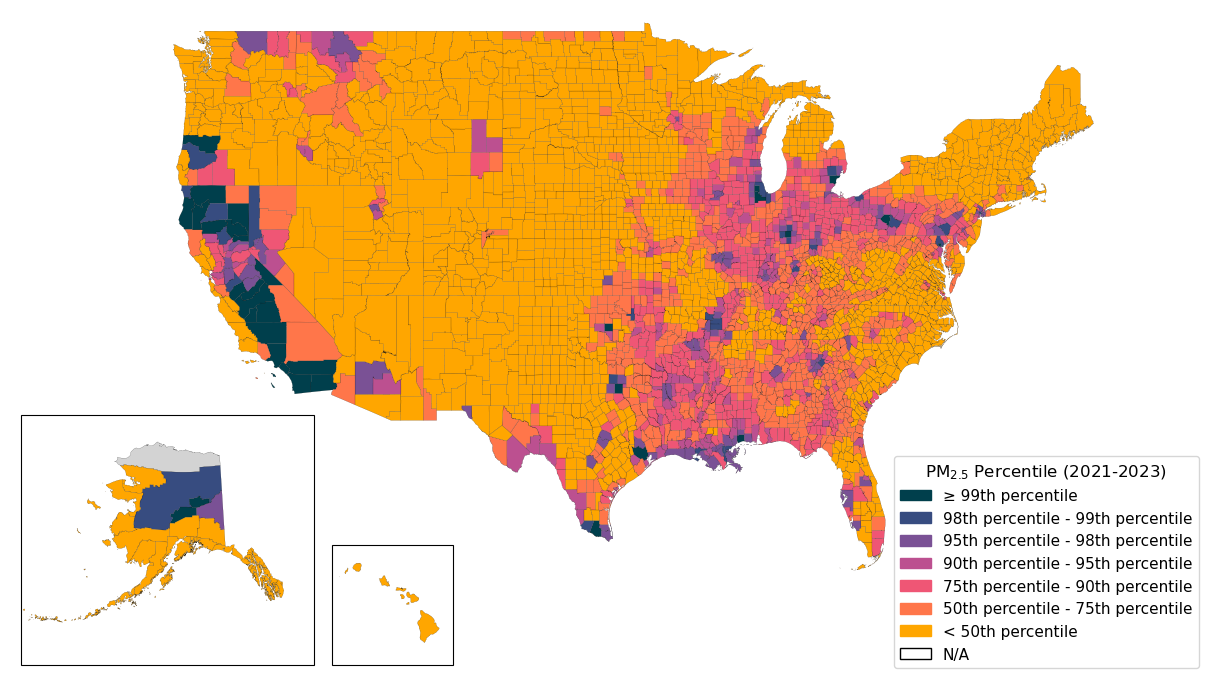

In [22]:
#figure 2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = df_counties.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 99th percentile": "#003f4c",
    "98th percentile - 99th percentile": "#374c80",
    "95th percentile - 98th percentile": "#7a5195",
    "90th percentile - 95th percentile": "#bc5090",
    "75th percentile - 90th percentile": "#ef5675",
    "50th percentile - 75th percentile": "#ff764a",
    "< 50th percentile": "#ffa600",
}
#Quantiles (5%, 25%, 50%, 75%, 90%, 95%, 98%, 99%): [ 5.33333349  6.70000029  7.43333292  8.09999943  8.59999943  9.09999943
 # 9.76666641 10.4333334 ]
# Assign colors manually based on new NO₂ rank ranges
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 7.433:
        return range_colors["< 50th percentile"]
    elif 7.433 <= value < 8.099:
        return range_colors["50th percentile - 75th percentile"]
    elif 8.099 <= value < 8.599:
        return range_colors["75th percentile - 90th percentile"]
    elif 8.599 <= value < 9.099:
        return range_colors["90th percentile - 95th percentile"]
    elif 9.099 <= value < 9.766:
        return range_colors["95th percentile - 98th percentile"]
    elif 9.766 <= value < 10.43:
        return range_colors["98th percentile - 99th percentile"]
    elif value >= 10.433:
        return range_colors["≥ 99th percentile"]


# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -62, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)
# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope


# Plot Alaska counties
'''alaska_counties.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["≥ 99th percentile", "98th percentile - 99th percentile", "95th percentile - 98th percentile", "90th percentile - 95th percentile", "75th percentile - 90th percentile", "50th percentile - 75th percentile", "< 50th percentile"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(7.2, 1.8),  # Adjusted to place it in the lower right corner
    title="PM$_{2.5}$ Percentile (2021-2023)",
    fontsize=11,
    title_fontsize=12
)

# Add a title to the plot
plt.show()


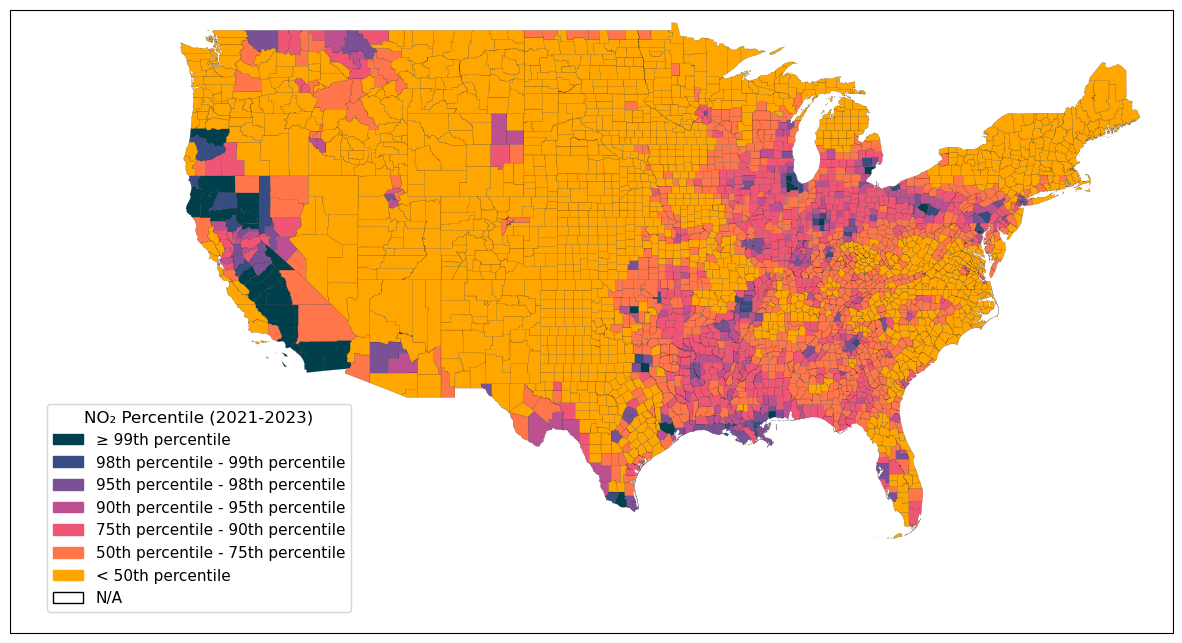

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import geopandas as gpd

# Convert to proper CRS
county_90th_percentile_with_geometry = df_counties.to_crs("EPSG:4326")

# Define the data column and the updated range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 99th percentile": "#003f4c",
    "98th percentile - 99th percentile": "#374c80",
    "95th percentile - 98th percentile": "#7a5195",
    "90th percentile - 95th percentile": "#bc5090",
    "75th percentile - 90th percentile": "#ef5675",
    "50th percentile - 75th percentile": "#ff764a",
    "< 50th percentile": "#ffa600",
}
#Quantiles (5%, 25%, 50%, 75%, 90%, 95%, 98%, 99%): [ 5.33333349  6.70000029  7.43333292  8.09999943  8.59999943  9.09999943
 # 9.76666641 10.4333334 ]
# Assign colors manually based on new NO₂ rank ranges
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 7.433:
        return range_colors["< 50th percentile"]
    elif 7.433 <= value < 8.099:
        return range_colors["50th percentile - 75th percentile"]
    elif 8.099 <= value < 8.599:
        return range_colors["75th percentile - 90th percentile"]
    elif 8.599 <= value < 9.099:
        return range_colors["90th percentile - 95th percentile"]
    elif 9.099 <= value < 9.766:
        return range_colors["95th percentile - 98th percentile"]
    elif 9.766 <= value < 10.43:
        return range_colors["98th percentile - 99th percentile"]
    elif value >= 10.433:
        return range_colors["≥ 99th percentile"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)

# Define and add a custom legend
labels = ["≥ 99th percentile", "98th percentile - 99th percentile", "95th percentile - 98th percentile", "90th percentile - 95th percentile", "75th percentile - 90th percentile", "50th percentile - 75th percentile", "< 50th percentile"]
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(0.3, 0.38),  # Adjusted for proper positioning
    title="NO₂ Percentile (2021-2023)",
    fontsize=11,
    title_fontsize=12
)

# Show the plot
plt.show()


In [15]:
# Define revised rank ranges (7 ranges in total)
rank_ranges = {
    "1 - 32": (1, 32),
    "33 - 63": (33, 63),
    "64 - 156": (64, 156),
    "157 - 313": (157, 313),
    "314 - 788": (314, 788),
    "789 - 1559": (789, 1559),
    "1560 - 3108": (1560, 3108),
}


# Initialize a dictionary to store results
cdve_ranges = {}

# Calculate the range of CDVEs for each rank range
for label, (rank_min, rank_max) in rank_ranges.items():
    # Filter dataframe for the current rank range
    filtered_df = county_90th_percentile_with_geometry[
        (county_90th_percentile_with_geometry["CDVE_rank"] >= rank_min) &
        (county_90th_percentile_with_geometry["CDVE_rank"] <= rank_max)
    ]
    
    # Calculate the min and max CDVE values
    min_cdve = filtered_df["avgtropVCD"].min()
    max_cdve = filtered_df["avgtropVCD"].max()
    
    # Store the result
    cdve_ranges[label] = (min_cdve, max_cdve)

# Display the results
for label, (min_cdve, max_cdve) in cdve_ranges.items():
    print(f"{label}: CDVE Range: {min_cdve:.2f} to {max_cdve:.2f} molec/cm^2")


1 - 32: CDVE Range: 5.64 to 14.51 molec/cm^2
33 - 63: CDVE Range: 4.59 to 5.60 molec/cm^2
64 - 156: CDVE Range: 3.50 to 4.57 molec/cm^2
157 - 313: CDVE Range: 2.86 to 3.48 molec/cm^2
314 - 788: CDVE Range: 2.15 to 2.86 molec/cm^2
789 - 1559: CDVE Range: 1.71 to 2.15 molec/cm^2
1560 - 3108: CDVE Range: 0.58 to 1.71 molec/cm^2


In [10]:
import numpy as np
import pandas as pd

# Sort dataframe by CDVE rank
county_90th_percentile_with_geometry = df_counties.sort_values(by="CDVE_rank")
#Quantiles (5%, 25%, 50%, 75%, 95%): [1.71127207 2.15691017 2.86433716 3.49159617
 #4.58361816 5.63869484]]
# Define the target CDVE breakpoints (from your desired output)
desired_cdve_ranges = [
    (5.63, 14.52),
    (4.58, 5.63),
    (3.49, 4.58),
    (2.86, 3.49),
    (2.15, 2.86),
    (1.71, 2.15),
    (0.58, 1.71)
]

# Identify new rank breakpoints to match desired CDVE ranges
cdve_values = county_90th_percentile_with_geometry["avgtropVCD"].values
cdve_ranks = county_90th_percentile_with_geometry["CDVE_rank"].values

# Ensure ranks are continuous
new_rank_ranges = {}
prev_rank = 1  # Start at rank 1

for i, (cdve_min, cdve_max) in enumerate(desired_cdve_ranges):
    # Find the first and last rank indices that match this CDVE range
    match_indices = np.where((cdve_values >= cdve_min) & (cdve_values <= cdve_max))[0]

    if len(match_indices) > 0:
        start_rank = prev_rank
        end_rank = start_rank + len(match_indices) - 1  # Make ranks continuous
        new_rank_ranges[f"Group {i+1}"] = (start_rank, end_rank)
        prev_rank = end_rank + 1  # Ensure next group starts immediately after
    else:
        print(f"Warning: No match found for range {cdve_min}-{cdve_max} μg/m³")

# Print the updated rank ranges
for label, (rank_min, rank_max) in new_rank_ranges.items():
    print(f"{label}: Rank {rank_min} to {rank_max}")


Group 1: Rank 1 to 32
Group 2: Rank 33 to 63
Group 3: Rank 64 to 156
Group 4: Rank 157 to 313
Group 5: Rank 314 to 788
Group 6: Rank 789 to 1559
Group 7: Rank 1560 to 3108
